In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Cleaning and preprocessing data for machine learning

In [3]:
# Read the csv file into a pandas DataFrame
tb1_df= pd.read_csv('../Resources/winequality.csv')
tb1_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [4]:
X = tb1_df[["density", "pH", "sulphates", "alcohol"]]
y = tb1_df["quality"].values.reshape(-1, 1)
print(X.shape, y.shape)

(6497, 4) (6497, 1)


In [5]:
data = X.copy()

# data_binary_encoded = pd.get_dummies(data, columns=["alcohol"])
# data_binary_encoded.head()

In [6]:
#Scaling and Normalization

In [7]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,density,pH,sulphates,alcohol
1539,0.99714,3.46,0.78,9.9
1109,0.99820,3.17,0.76,10.8
100,0.99720,3.40,0.61,10.2
5477,0.99692,3.18,0.49,9.4
6416,0.99128,3.20,0.63,11.2


In [8]:
#StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [10]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

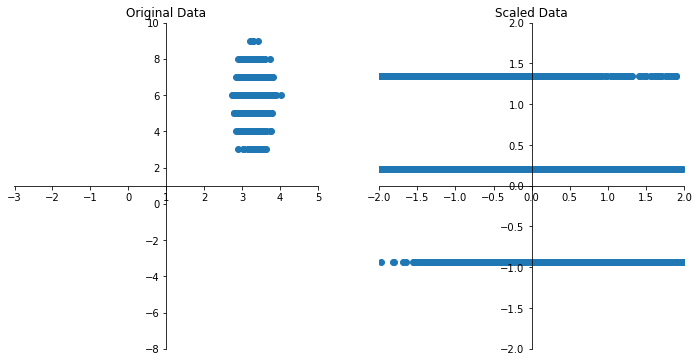

In [11]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["pH"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["pH"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

plt.savefig("../static/images/scaling_normalization.png")

In [12]:
plt.show()

In [13]:
#  Putting it all together..

In [14]:
# Convert Categorical data to numbers using Integer or Binary Encoding
X = pd.get_dummies(tb1_df[["color"]])
y = tb1_df["quality"].values.reshape(-1, 1)
X.head()

,color_red,color_white
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [15]:
#Split data into training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [16]:
# Scale or Normalize data (StandardScaler if don't know anything about data).

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

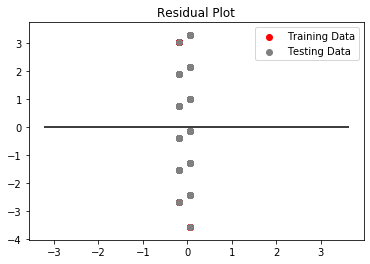

In [17]:
#Fitted the Model to the scaled training data and made predictions using the scaled test data.

# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="red", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="grey", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
# plt.show()

plt.savefig("../static/images/scaling_normalization2.png")

In [18]:
# Quantified model using the scaled data

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.9534568282947437, R2: 0.013413556666647675
